<a href="https://colab.research.google.com/github/leonbenenati/LH_CD_Leon/blob/main/LH_CD_Leon_Emiliano_Benenati_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes e ajustes iniciais

In [1]:
#importando os pacotes
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df = pd.read_csv("/content/teste_indicium_precificacao.csv")
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [ ]:
#Verificando dados faltantes
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

# Preços

<Axes: xlabel='price', ylabel='Count'>

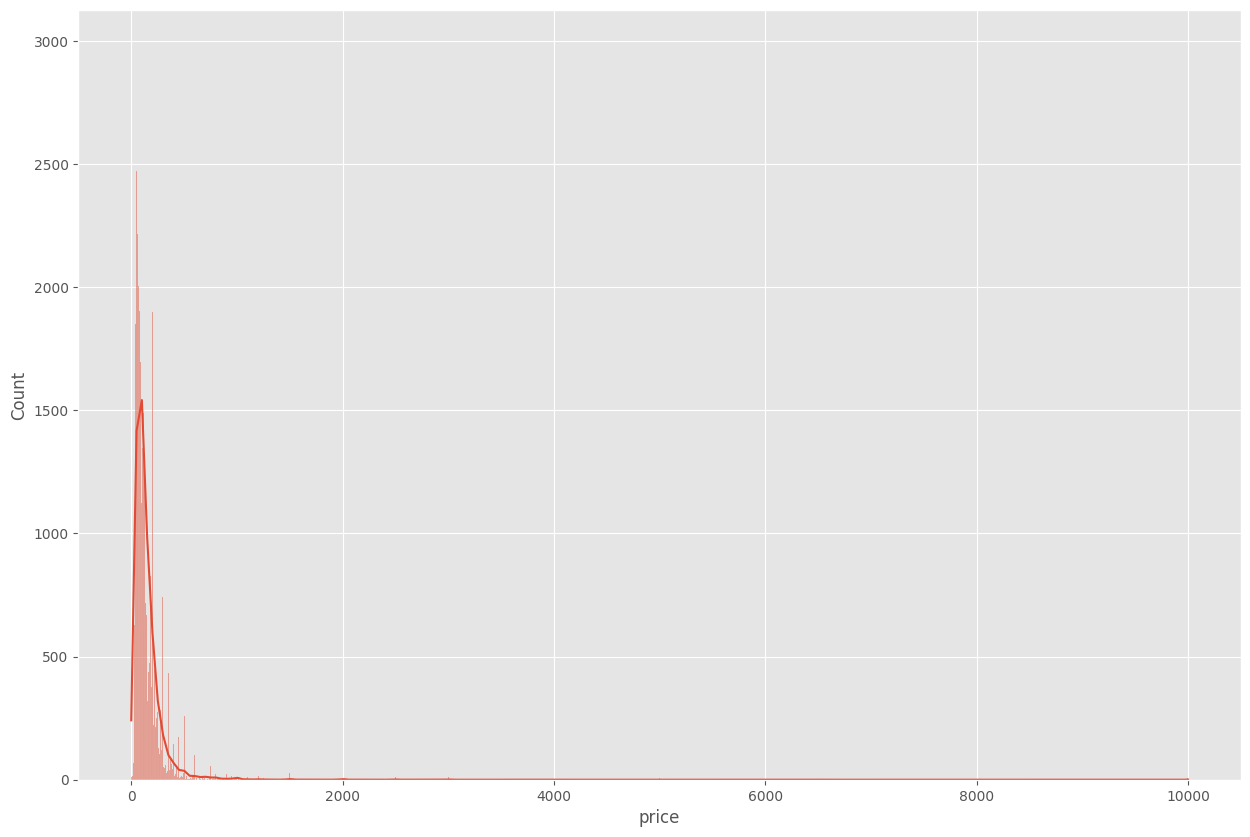

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df['price'], kde=True)



*   Tem preços chegando a 100 mil mas a maioria está bem antes dos 1000 como mostra o gráfico em cima



In [ ]:
df["price"].mean()

152.7207632838385

In [ ]:
df["price"].median()

106.0

In [ ]:
df["price"].max()

10000

In [ ]:
df["price"].min()

0

In [ ]:
df["price"].std()

240.1566250608003

Sobre a váriavel alvo preço:

*   Média 152
*   Mediana: 106
*   Maximo: 1000
*   Mínimo1: 0
*   Desvio padrão: 240

Há outilers nos dados de preço



<Axes: xlabel='price', ylabel='Count'>

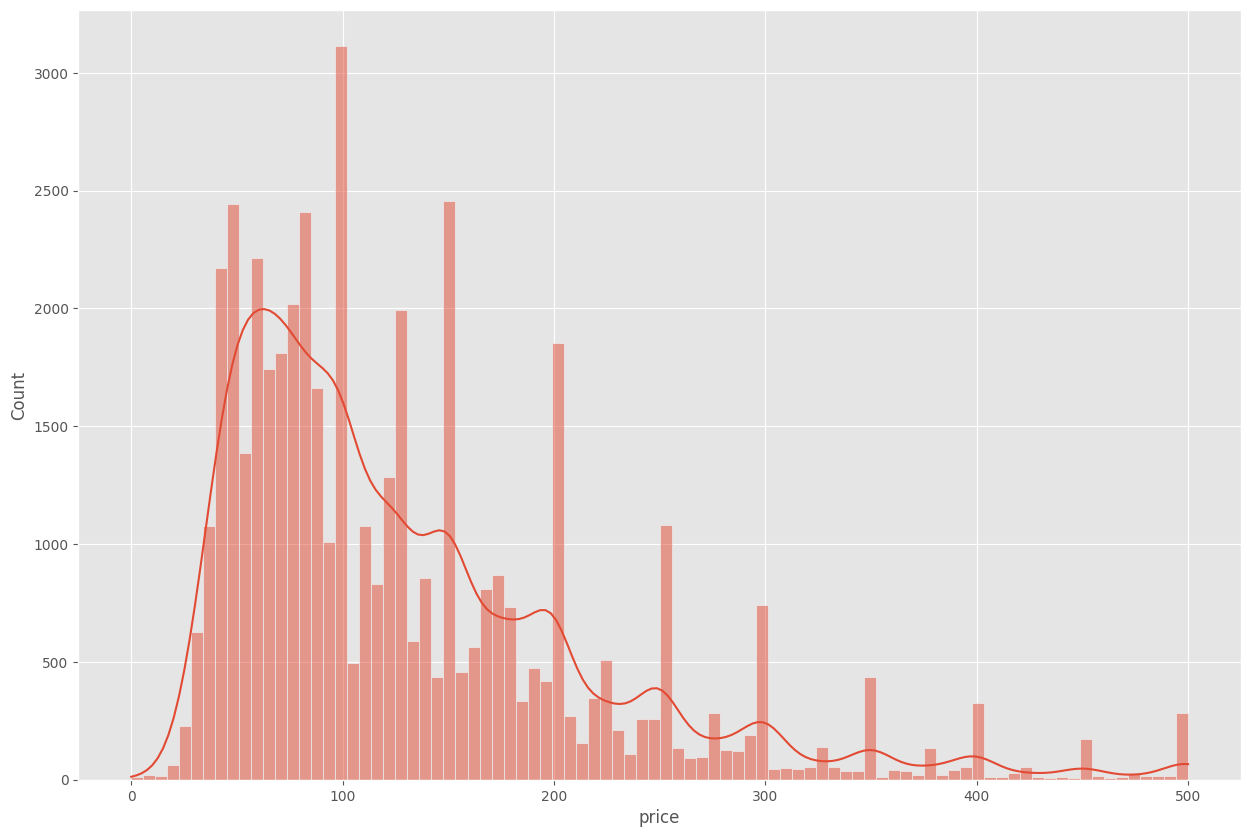

In [7]:
##Fazendo gráfico com preço menor que 500

filtered_df = df[df['price'] <= 500]
plt.figure(figsize=(15,10))
sns.histplot(filtered_df['price'], kde=True)



*   No gráfico de até 500 podemos ver que a maior parte dos preços estão entre 0 a 200



In [5]:
df.shape

(48894, 16)

In [8]:
filtered_df.shape

(47850, 16)



*   Total: 48894 Colunas
*   Preço até 500: 47850 colunas

Quase 98% dos dados são até 500 dolares



# Distritos - bairro_group

<Axes: xlabel='bairro_group', ylabel='Count'>

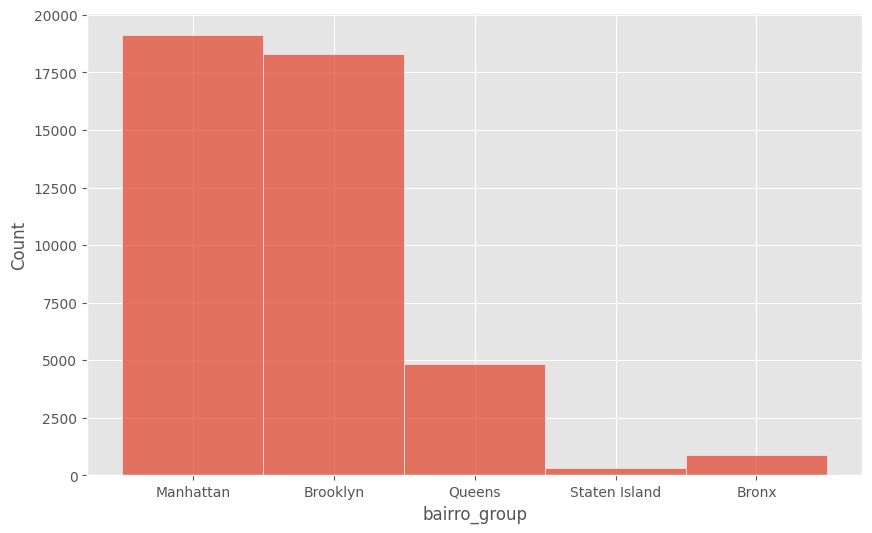

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['bairro_group'])

In [22]:
df['bairro_group'].value_counts()

Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: bairro_group, dtype: int64


*   Manhattan e Brookly são os bairros com maior oferta de imoveis para alugar



<Axes: xlabel='bairro_group', ylabel='price'>

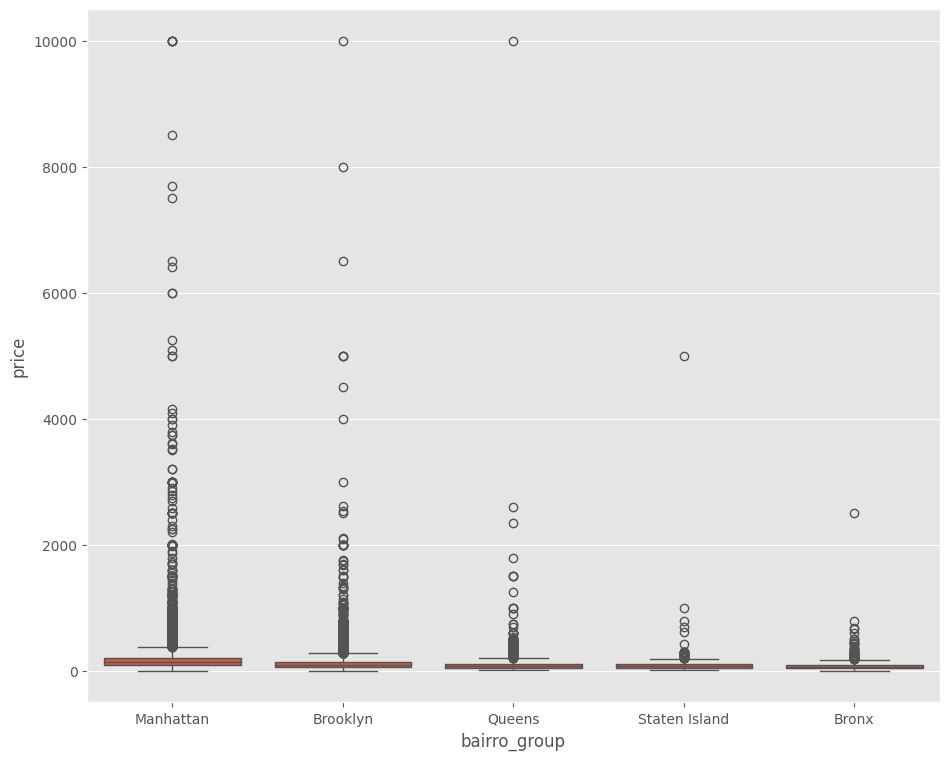

In [ ]:
#Gráfico dos bairros com todo dataset
plt.figure(figsize = (11,9))
sns.boxplot(x=df["bairro_group"],y=df['price'])

<Axes: xlabel='bairro_group', ylabel='price'>

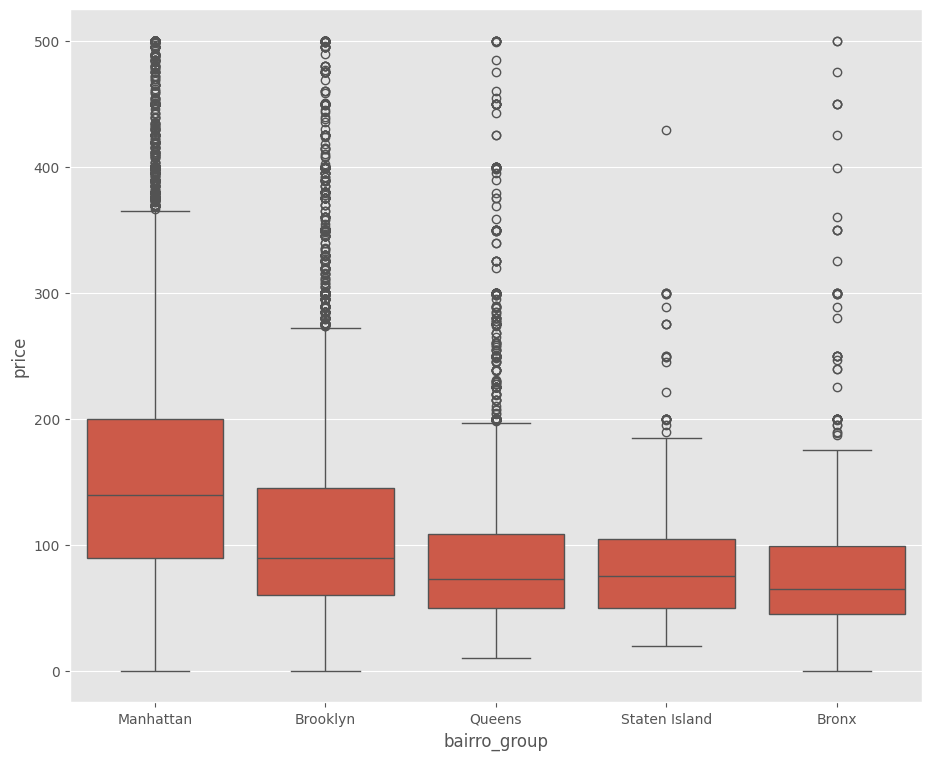

In [ ]:
#Gráfico dos bairros com preços até 500
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (11,9))
sns.boxplot(x=df["bairro_group"],y=filtered_df['price'])



1.   Manhattan tem o maiores preços
2.   Brookly tem o segundo maior





# Bairros - bairro

In [18]:
filtered_df = df[df['bairro_group'] == "Manhattan"]
filtered_df['bairro'].value_counts()

Harlem                 2658
Upper West Side        1971
Hell's Kitchen         1958
East Village           1853
Upper East Side        1798
Midtown                1545
East Harlem            1117
Chelsea                1113
Lower East Side         911
Washington Heights      899
West Village            768
Financial District      744
Murray Hill             485
Kips Bay                470
Greenwich Village       392
Chinatown               368
SoHo                    358
Morningside Heights     346
Gramercy                338
Theater District        288
Nolita                  253
Inwood                  252
Tribeca                 177
Little Italy            121
Flatiron District        80
NoHo                     78
Roosevelt Island         77
Two Bridges              72
Battery Park City        70
Civic Center             52
Stuyvesant Town          37
Marble Hill              12
Name: bairro, dtype: int64

In [25]:
filtered_df = df[df['bairro_group'] == "Brooklyn"]
filtered_df['bairro'].value_counts()

Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Sunset Park                   390
Prospect Heights              357
South Slope                   284
Gowanus                       247
Carroll Gardens               233
East New York                 218
Boerum Hill                   177
Kensington                    174
Sheepshead Bay                164
Windsor Terrace               157
Brooklyn Heights              154
Canarsie                      147
Bay Ridge                     141
Borough Park                  136
Cypress Hills                 135
Midwood                       109
Cobble Hill                    99
Flatlands                      83
Downtown Brook



*   Há um número considerável de imõveis em cada bairro
*   Isso é útil para o modelo captar as diferenças nos bairros







*   Mais de 200 tipos bairros diferentes



# Room_type

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22325
Shared room         1160
Name: room_type, dtype: int64

<Axes: xlabel='room_type', ylabel='Count'>

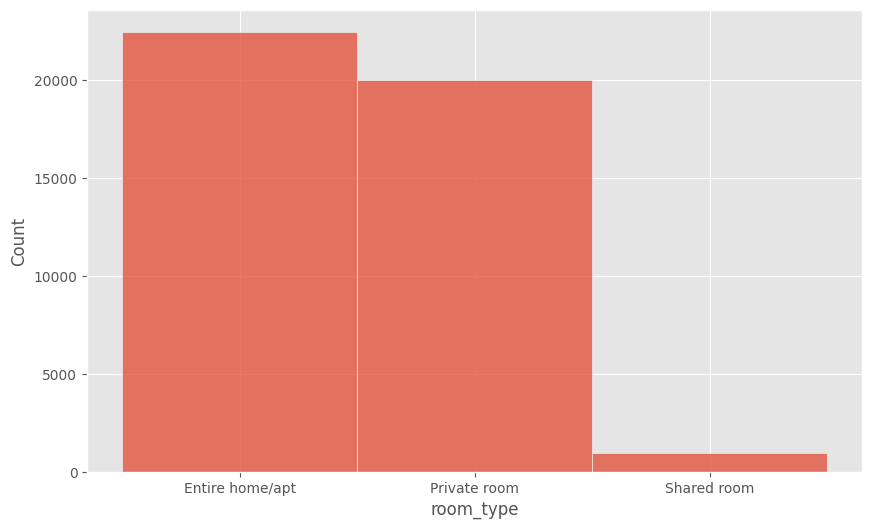

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['room_type'])



*   Entire home/apt e Private room são os principais tipos de espaços



<Axes: xlabel='room_type', ylabel='price'>

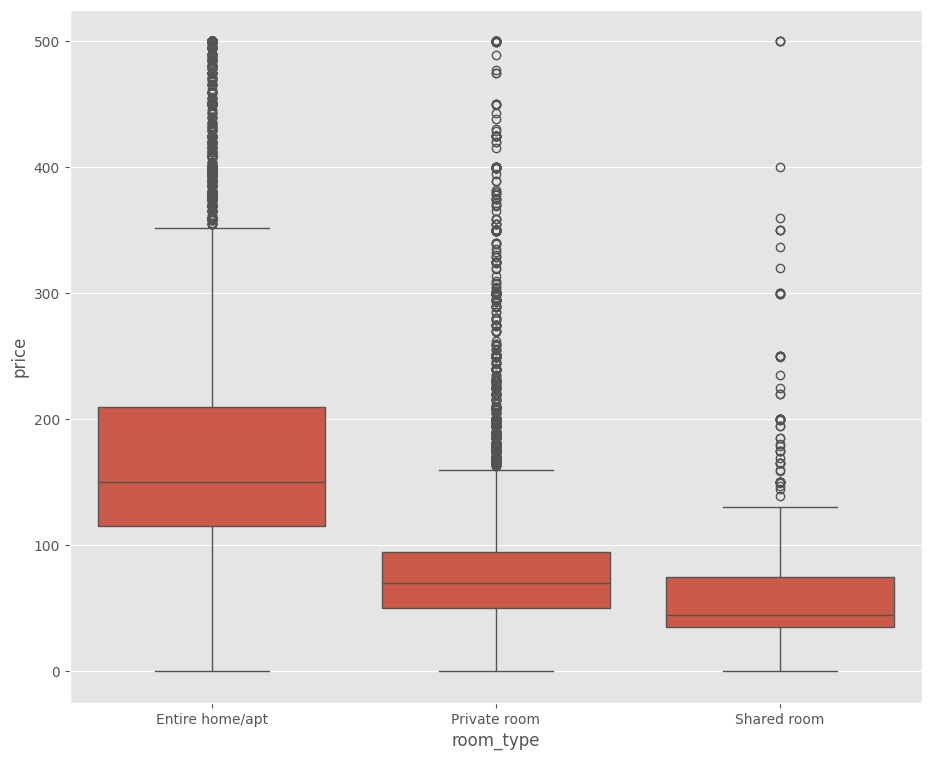

In [ ]:
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (11,9))
sns.boxplot(x=df["room_type"],y=filtered_df['price'])



*   Entire home/apt tem os maiores preços.




# minimo_noites

In [ ]:
df['minimo_noites'].describe()

count    43443.000000
mean         7.027461
std         20.966058
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

In [ ]:
df["minimo_noites"].value_counts(normalize=True)*100

1      26.013417
2      23.921136
3      16.359881
30      7.690105
4       6.755430
         ...    
186     0.002045
366     0.002045
68      0.002045
87      0.002045
36      0.002045
Name: minimo_noites, Length: 109, dtype: float64

<Axes: xlabel='minimo_noites', ylabel='Count'>

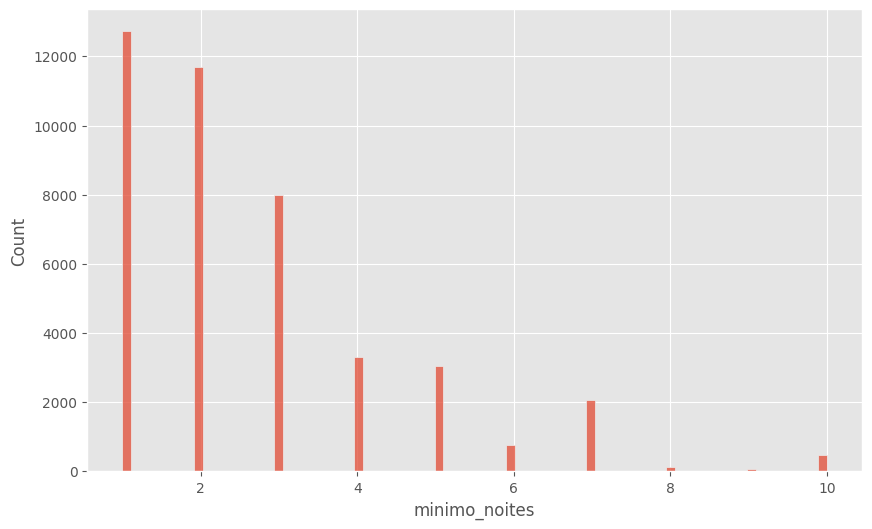

In [ ]:
filtered_df = df[df['minimo_noites'] <= 10]
plt.figure(figsize=(10,6))
sns.histplot(filtered_df['minimo_noites'])

<Axes: xlabel='minimo_noites', ylabel='price'>

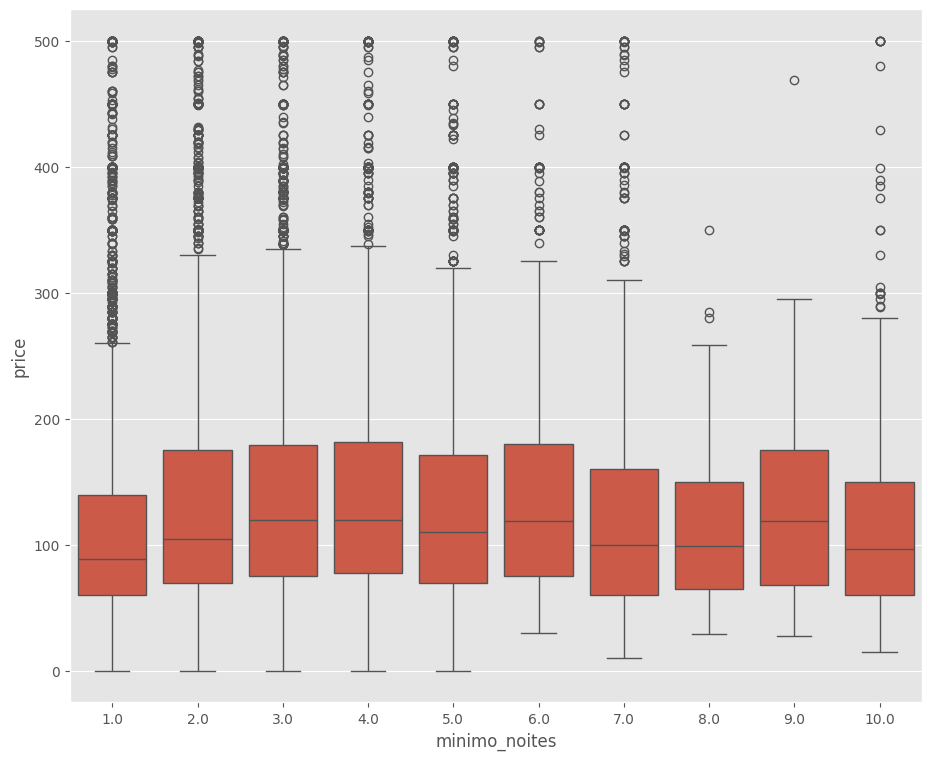

In [ ]:
filtered_df1 = df[df['minimo_noites'] <= 10]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (11,9))
sns.boxplot(x=filtered_df1["minimo_noites"],y=filtered_df['price'])

<Axes: xlabel='minimo_noites', ylabel='price'>

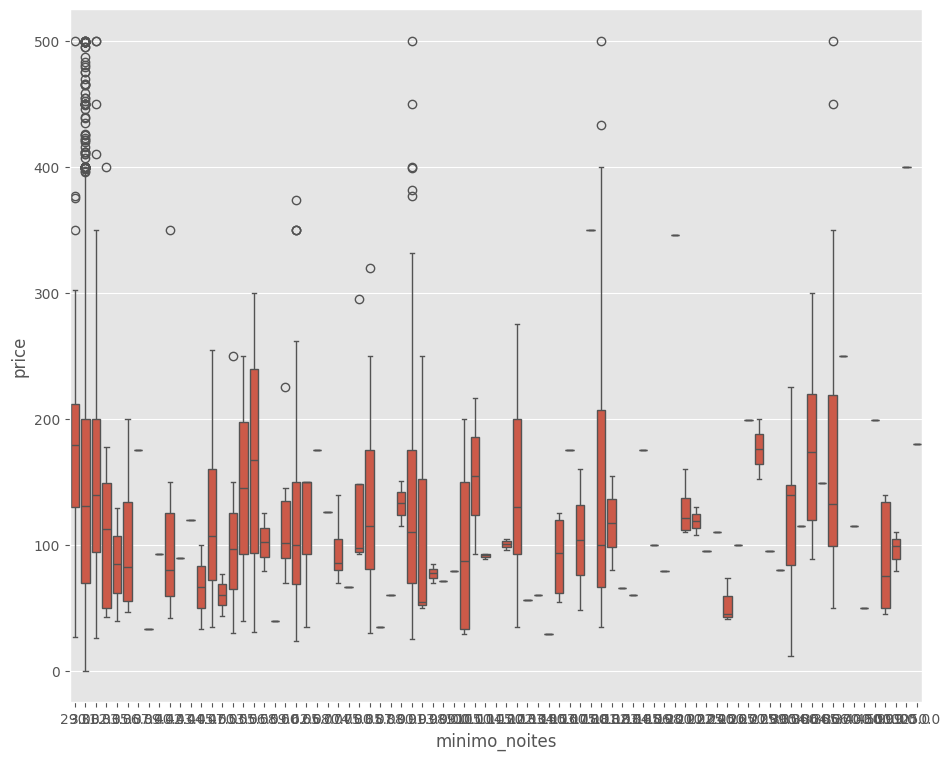

In [ ]:
filtered_df1 = df[df['minimo_noites'] >= 29]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (11,9))
sns.boxplot(x=filtered_df1["minimo_noites"],y=filtered_df['price'])

<Axes: xlabel='minimo_noites', ylabel='price'>

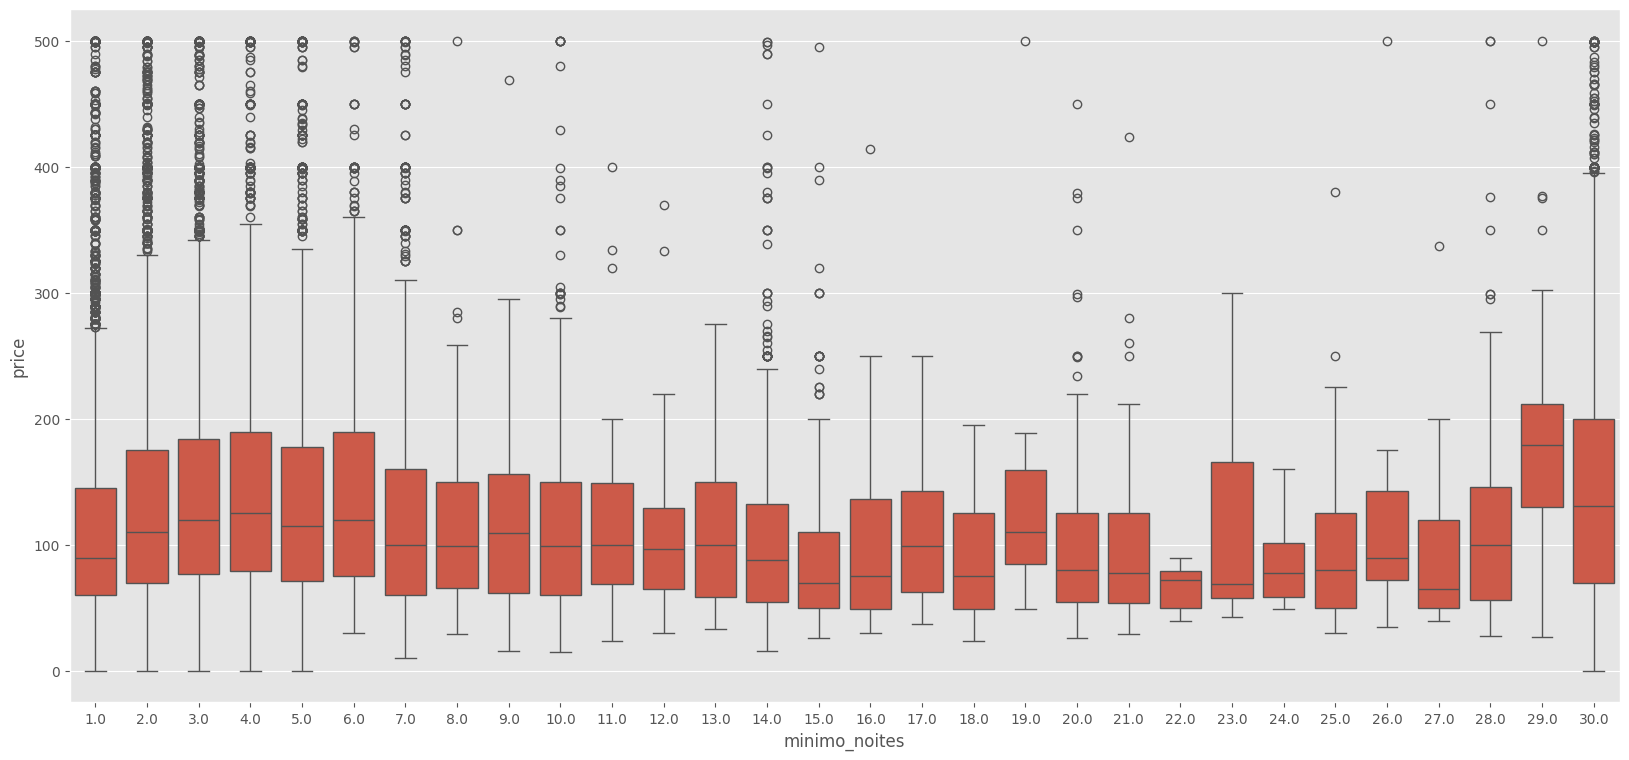

In [ ]:
filtered_df1 = df[df['minimo_noites'] <= 30]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (20,9))
sns.boxplot(x=filtered_df1["minimo_noites"],y=filtered_df['price'])



*   A partir de 29 e 30 dias a mediana do preço sobe
*   de 1 a 28 dias tem variações que é visivel mas não são tão grandes como ocorre a partir do dia 29





# numero_de_reviews

In [ ]:
df['numero_de_reviews'].describe()

count    43443.000000
mean        25.949359
std         46.565611
min          0.000000
25%          1.000000
50%          7.000000
75%         28.000000
max        629.000000
Name: numero_de_reviews, dtype: float64

<Axes: xlabel='numero_de_reviews', ylabel='Count'>

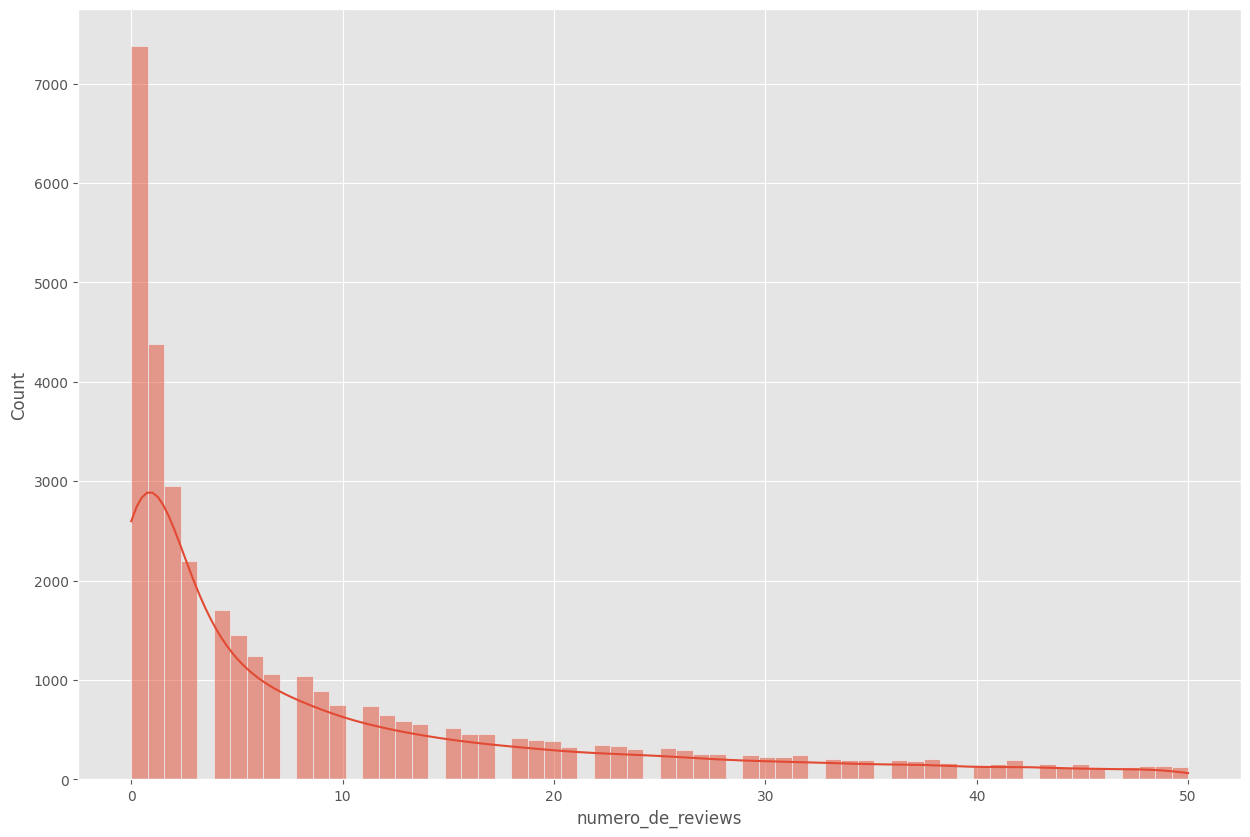

In [ ]:
filtered_df = df[df['numero_de_reviews'] <= 50]
plt.figure(figsize=(15,10))
sns.histplot(filtered_df['numero_de_reviews'], kde=True)

<Axes: xlabel='numero_de_reviews', ylabel='price'>

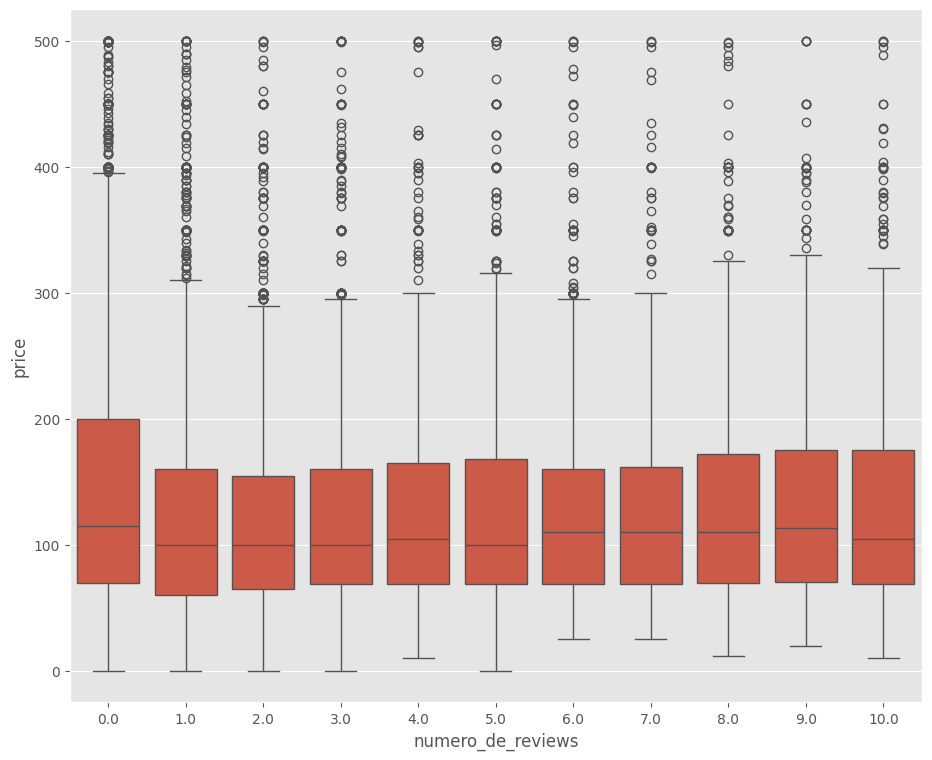

In [ ]:
filtered_df1 = df[df['numero_de_reviews'] <= 10]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (11,9))
sns.boxplot(x=filtered_df1["numero_de_reviews"],y=filtered_df['price'])



*  A maior diferença notável é no número zero



# calculado_host_listings_count

In [ ]:
df["calculado_host_listings_count"]

0        2
1        1
2        1
3        1
4        1
        ..
48889    2
48890    2
48891    1
48892    6
48893    1
Name: calculado_host_listings_count, Length: 48894, dtype: int64

In [ ]:
df["calculado_host_listings_count"].value_counts()

1      32303
2       6658
3       2853
4       1440
5        845
6        569
8        416
7        399
327      327
9        234
232      232
10       210
96       192
12       180
13       130
121      121
11       110
52       104
103      103
33        99
49        98
91        91
87        87
15        75
14        70
23        69
34        68
17        68
65        65
31        62
28        56
18        54
25        50
50        50
47        47
43        43
20        40
39        39
37        37
32        32
30        30
29        29
27        27
26        26
21        21
19        19
16        16
Name: calculado_host_listings_count, dtype: int64

In [ ]:
df["calculado_host_listings_count"].value_counts(normalize=True)*100

1      66.067411
2      13.617213
3       5.835072
4       2.945147
5       1.728228
6       1.163742
8       0.850820
7       0.816051
327     0.668794
9       0.478586
232     0.474496
10      0.429501
96      0.392686
12      0.368143
13      0.265881
121     0.247474
11      0.224976
52      0.212705
103     0.210660
33      0.202479
49      0.200434
91      0.186117
87      0.177936
15      0.153393
14      0.143167
23      0.141122
34      0.139076
17      0.139076
65      0.132941
31      0.126805
28      0.114533
18      0.110443
25      0.102262
50      0.102262
47      0.096126
43      0.087945
20      0.081810
39      0.079764
37      0.075674
32      0.065448
30      0.061357
29      0.059312
27      0.055221
26      0.053176
21      0.042950
19      0.038860
16      0.032724
Name: calculado_host_listings_count, dtype: float64



*   1 e 2 correspondem a quase 80%
*   Até 6 é quase 90%


<Axes: xlabel='calculado_host_listings_count', ylabel='price'>

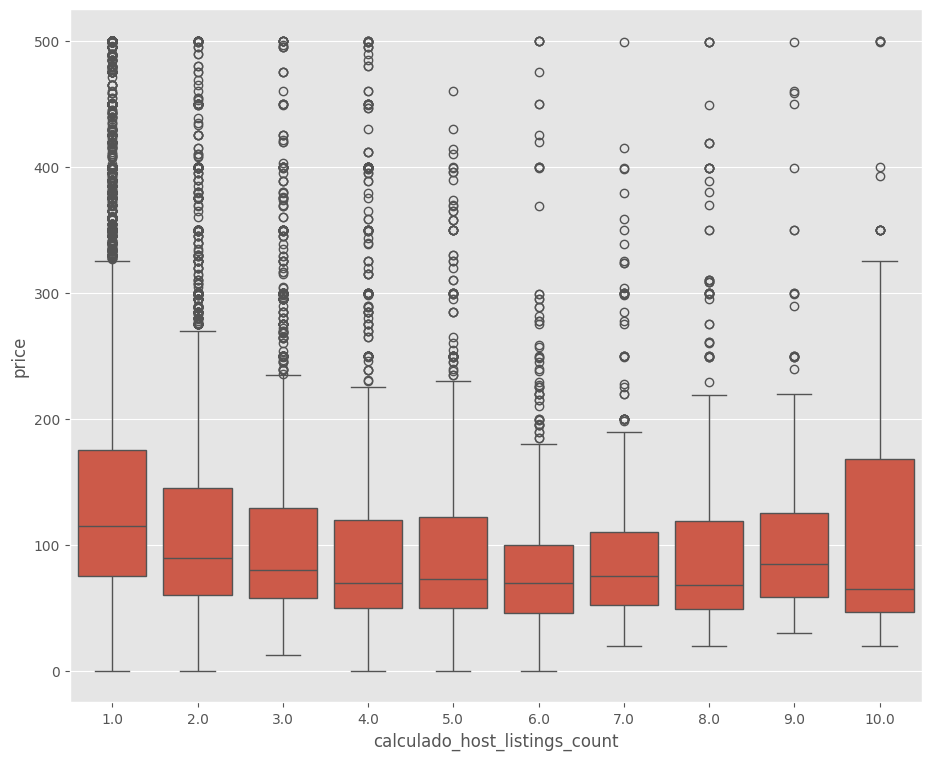

In [ ]:
#Preços por até 10
filtered_df1 = df[df['calculado_host_listings_count'] <= 10]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (11,9))
sns.boxplot(x=filtered_df1["calculado_host_listings_count"],y=filtered_df['price'])



*   As medianas de cada quantidade mudam, em 1 e 10 isso é mais notado



# disponibilidade_365

In [ ]:
df["disponibilidade_365"].value_counts(normalize=True)*100

0      35.859206
365     2.646541
364     1.004213
1       0.834458
89      0.738332
         ...    
195     0.053176
183     0.049086
196     0.049086
181     0.047041
202     0.040905
Name: disponibilidade_365, Length: 366, dtype: float64

<Axes: xlabel='disponibilidade_365', ylabel='price'>

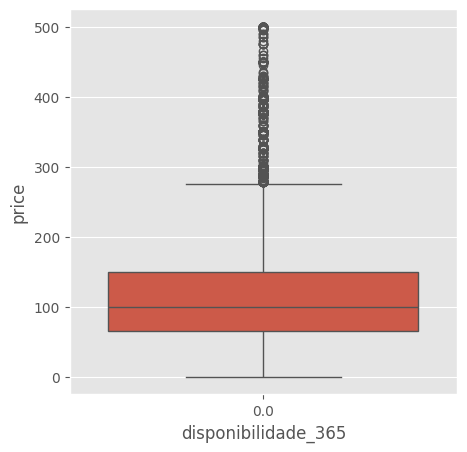

In [ ]:
filtered_df1 = df[df['disponibilidade_365'] == 0]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (5,5))
sns.boxplot(x=filtered_df1["disponibilidade_365"],y=filtered_df['price'])

<Axes: xlabel='disponibilidade_365', ylabel='price'>

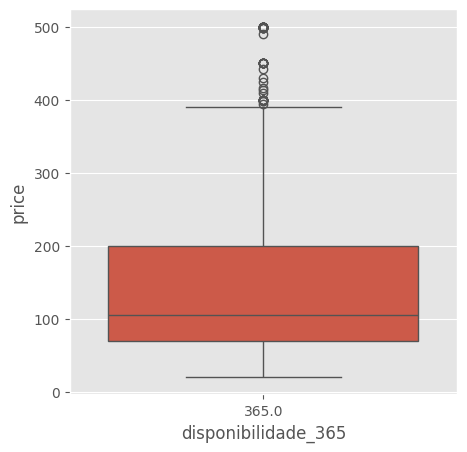

In [ ]:
filtered_df1 = df[df['disponibilidade_365'] == 365]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (5,5))
sns.boxplot(x=filtered_df1["disponibilidade_365"],y=filtered_df['price'])

<Axes: xlabel='disponibilidade_365', ylabel='price'>

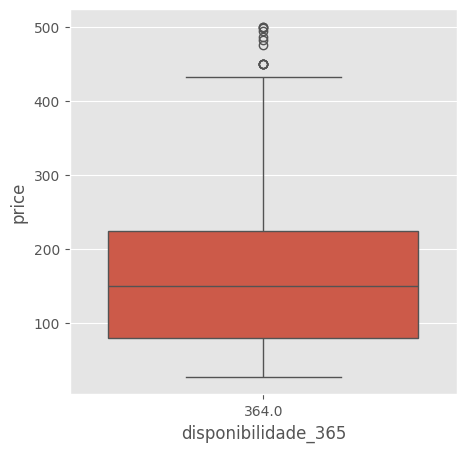

In [ ]:
filtered_df1 = df[df['disponibilidade_365'] == 364]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (5,5))
sns.boxplot(x=filtered_df1["disponibilidade_365"],y=filtered_df['price'])

<Axes: xlabel='disponibilidade_365', ylabel='Count'>

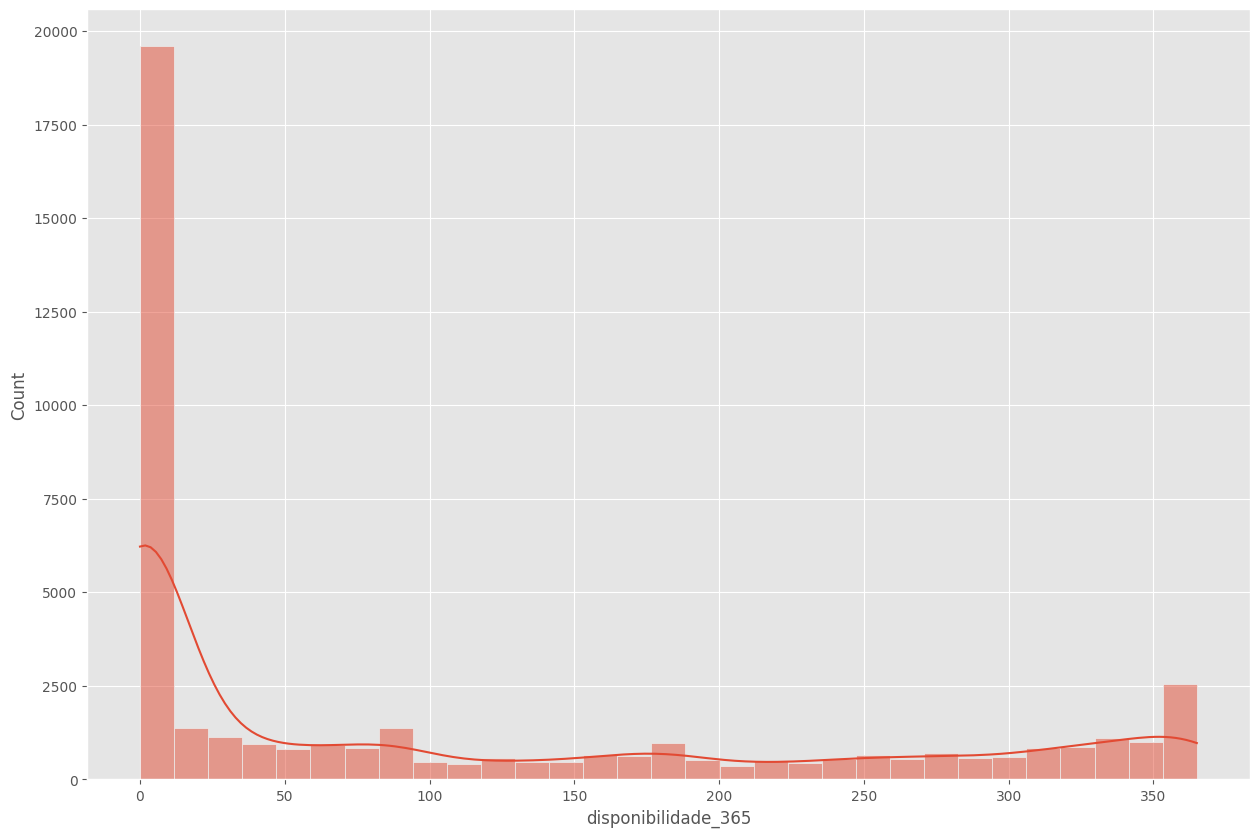

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df['disponibilidade_365'], kde=True)

# Correlação

In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
id,1.000000,0.588282,-0.003178,0.090896,0.010618,-0.013235,-0.319782,0.291810,0.133274,0.085541
host_id,0.588282,1.000000,0.020199,0.127049,0.015309,-0.017370,-0.140113,0.296406,0.154951,0.203535
latitude,-0.003178,0.020199,1.000000,0.084777,0.033939,0.024861,-0.015399,-0.010168,0.019517,-0.010926
longitude,0.090896,0.127049,0.084777,1.000000,-0.150020,-0.062750,0.059092,0.145941,-0.114713,0.082751
price,0.010618,0.015309,0.033939,-0.150020,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081833
minimo_noites,-0.013235,-0.017370,0.024861,-0.062750,0.042799,1.000000,-0.080118,-0.121708,0.127960,0.144320
numero_de_reviews,-0.319782,-0.140113,-0.015399,0.059092,-0.047954,-0.080118,1.000000,0.549865,-0.072376,0.172047
reviews_por_mes,0.291810,0.296406,-0.010168,0.145941,-0.030608,-0.121708,0.549865,1.000000,-0.009421,0.185835
calculado_host_listings_count,0.133274,0.154951,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225711
disponibilidade_365,0.085541,0.203535,-0.010926,0.082751,0.081833,0.144320,0.172047,0.185835,0.225711,1.000000


<ipython-input-20-8b3e9217d723>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


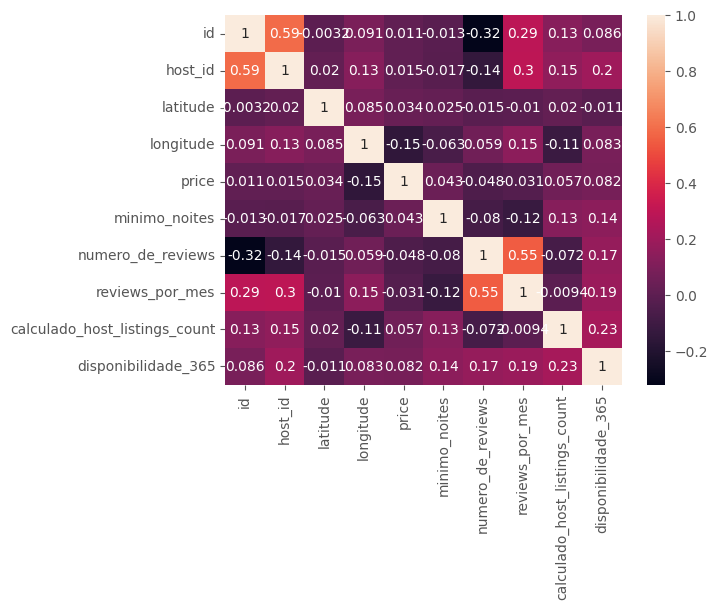

In [ ]:
import seaborn as sns
flights = sns.load_dataset("flights")
ax = sns.heatmap(df.corr(), annot=True)



*   Reviews_por_mes e numero_de_reviees tem relativa alta correlação
*   As outras váriaveis não estão tão correlacionadas





# 2A Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

<Axes: xlabel='bairro_group', ylabel='Count'>

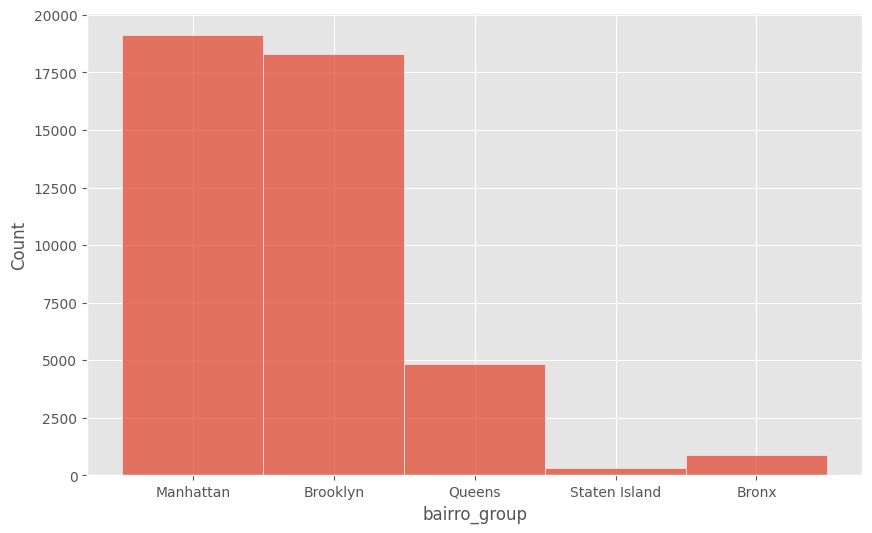

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['bairro_group'])

<Axes: xlabel='bairro_group', ylabel='price'>

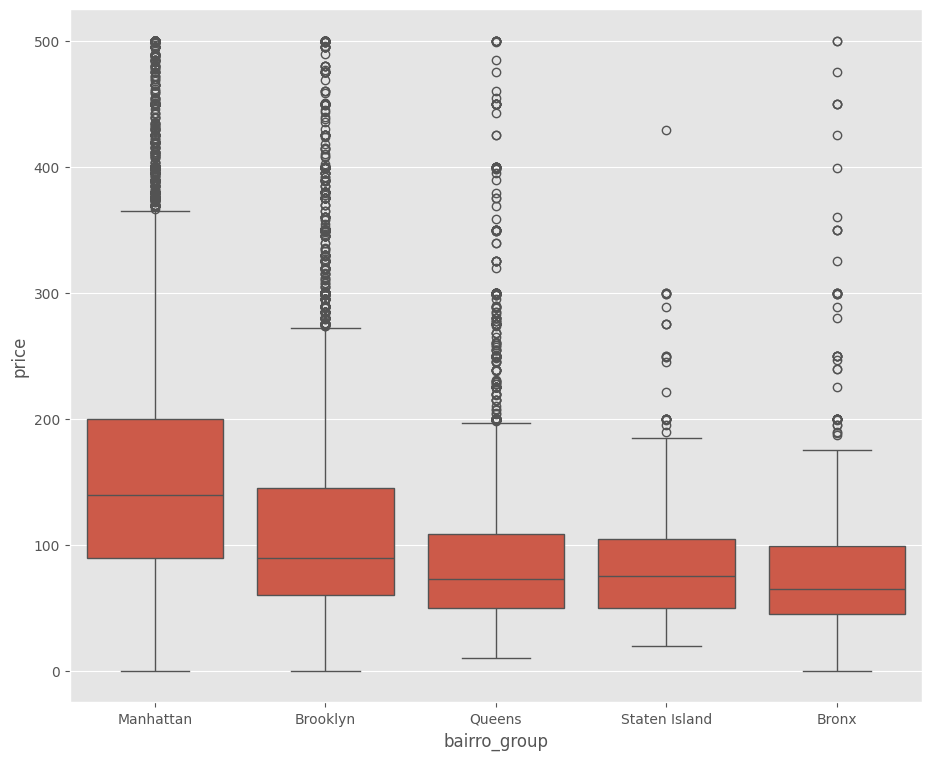

In [ ]:
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (11,9))
sns.boxplot(x=df["bairro_group"],y=filtered_df['price'])



*  Os lugares mais indicados são Manhattan e Brooklyn por terem maior oferta, e por consequência maior demanda

*   Manhattan tem maior mediana que o Brooklyn.

*  Manhattan é o local indicado para comprar para alugar






# 2B O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

<Axes: xlabel='minimo_noites', ylabel='price'>

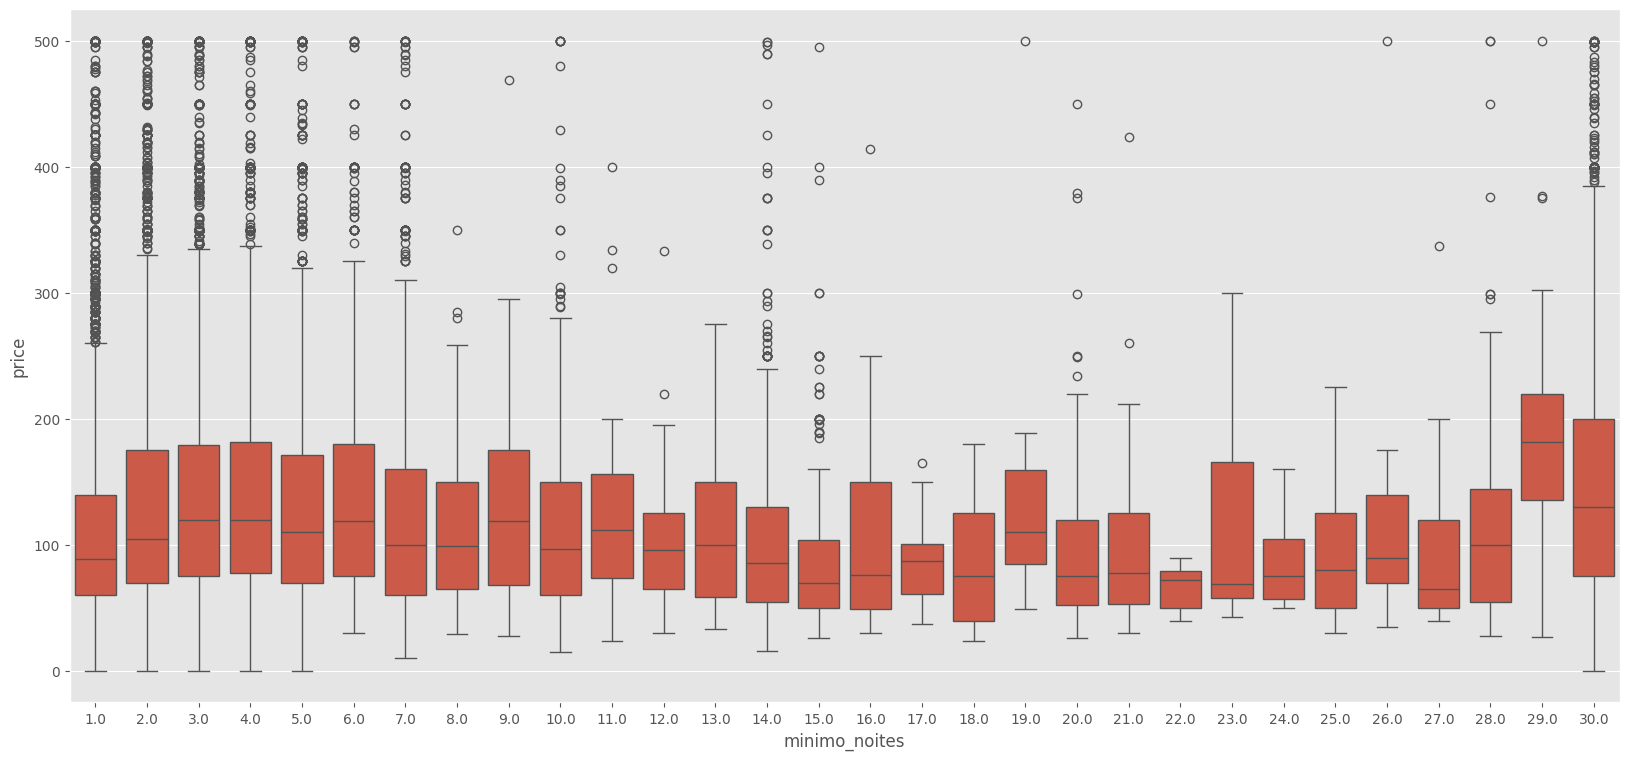

In [ ]:
filtered_df1 = df[df['minimo_noites'] <= 30]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (20,9))
sns.boxplot(x=filtered_df1["minimo_noites"],y=filtered_df['price'])

*   A partir de 29 e 30 dias a mediana do preço sobe
*   de 1 a 28 dias tem variações que é visivel mas não são tão grandes como ocorre a partir do dia 29

<Axes: xlabel='disponibilidade_365', ylabel='price'>

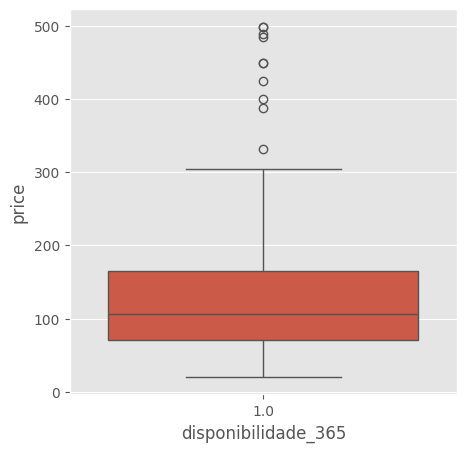

In [ ]:
filtered_df1 = df[df['disponibilidade_365'] == 1]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (5,5))
sns.boxplot(x=filtered_df1["disponibilidade_365"],y=filtered_df['price'])

<Axes: xlabel='disponibilidade_365', ylabel='price'>

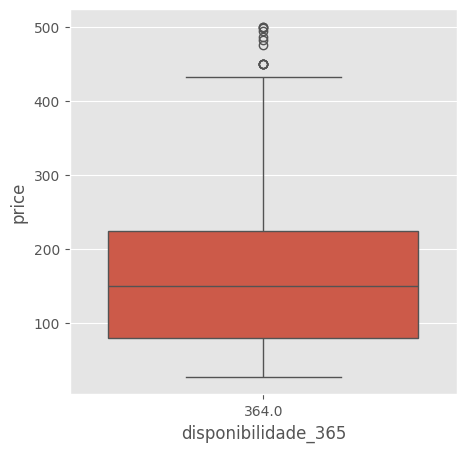

In [ ]:
filtered_df1 = df[df['disponibilidade_365'] == 364]
filtered_df = df[df['price'] <= 500]
plt.figure(figsize = (5,5))
sns.boxplot(x=filtered_df1["disponibilidade_365"],y=filtered_df['price'])



*   Comparando a disponibilidade 1 com 364 há diferenças nos preços



#2C Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [ ]:
df["nome"].describe()

count              48878
unique             47904
top       Hillside Hotel
freq                  18
Name: nome, dtype: object

In [ ]:
df_alto = df[df['price'] > 1500]
df_alto ["nome"].describe()

count                                                  139
unique                                                 138
top       Chelsea Gallery Space for events and exhibitions
freq                                                     2
Name: nome, dtype: object

In [ ]:
df_alto ["nome"].unique()

array(['Luxury 2Bed/2.5Bath Central Park View',
       'Beautiful 3 bedroom in Manhattan',
       'Lux 2Bed/2.5Bath Central Park Views',
       'Sunny, Family-Friendly 2 Bedroom',
       'Architecturally Stunning Former Synagogue!',
       'West Village Penthouse-terrace/view',
       'Beautiful 1 Bedroom in Nolita/Soho ', 'Carol',
       'Huge Loft with Private Entrance',
       'UWS 1BR w/backyard + block from CP',
       '1500 sq ft apt sleeps 8 - SuperBowl', 'Lower Park Avenue Pre War',
       'NYC SuperBowl Wk 5 Bdrs River View ',
       'SuperBowl Penthouse Loft 3,000 sqft',
       'Huge 3BR Penthouse, Private Roof!',
       'SUPER BOWL Brooklyn Duplex Apt!!', '3 Bedroom Apartment',
       'Penthouse with Private Rooftop for Events/Shoots',
       'Prime NYC Location for Super Bowl ',
       'MANHATTAN SUPERBOWL ACCOMODATION',
       'Luxury 5BR Townhouse, Upper East',
       'NearWilliamsburg bridge 11211 BK', 'Photography Location',
       'Film Location', 'Columbus Circle and 

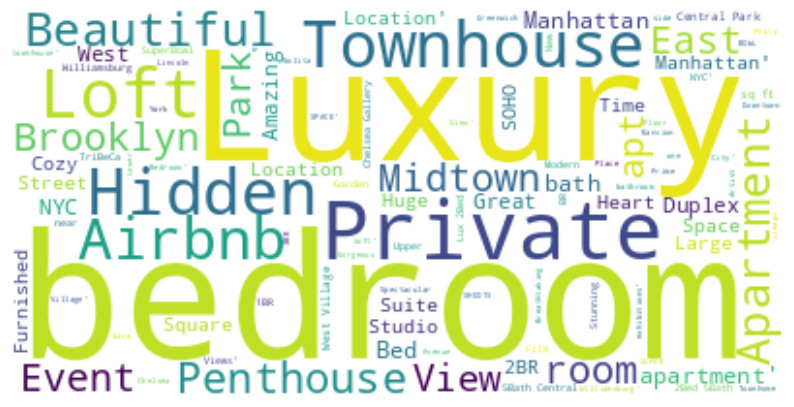

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#Criando nuvem de palavra
plt.figure(figsize=(10,10))
texto = df_alto ["nome"].values

#Gerando nuvem de palavras
nuvem_total = WordCloud(background_color="white").generate(str(texto))

#criando a imagem
plt.imshow(nuvem_total, interpolation='bilinear')
plt.axis('off')
#mostrando
plt.show()




*   A nuvem de palavras foi gerada com os nomes dos locais com preço acima de 1500

*  Vemos palavras como Luxury, privante, beedroom como as que mais aparecem


